# Tarea de Mapa

Nombre: Andres Arias

In [4]:
import re
import csv

In [1]:
with open('data/pubmed_frogpeptid_set.txt',encoding= 'utf-8') as f:
    Mytext = f.read()

In [2]:
len(Mytext)

20787295

In [6]:
Mytext = re.sub(r'\n\s{6}', ' ', Mytext)
dat= re.findall (r"\,\s[A-zA-Z]{2,13}\.", Mytext)
print(dat)


[', Serbia.', ', UK.', ', Av.', ', Ecuador.', ', Av.', ', Ecuador.', ', Av.', ', Ecuador.', ', Av.', ', Ecuador.', ', Ecuador.', ', Ecuador.', ', UK.', ', Av.', ', Ecuador.', ', Ecuador.', ', Av.', ', Ecuador.', ', Av.', ', Ecuador.', ', respectively.', ', Inc.', ', Japan.', ', Bv.', ', Argentina.', ', Argentina.', ', Argentina.', ', Argentina.', ', Argentina.', ', Brazil.', ', Bv.', ', Argentina.', ', Brazil.', ', Brazil.', ', Portugal.', ', Portugal.', ', Portugal.', ', Portugal.', ', Portugal.', ', Spain.', ', Bv.', ', Argentina.', ', Brazil.', ', Bv.', ', Argentina.', ', China.', ', China.', ', China.', ', China.', ', China.', ', China.', ', China.', ', China.', ', China.', ', China.', ', China.', ', China.', ', China.', ', India.', ', India.', ', India.', ', India.', ', respectively.', ', China.', ', China.', ', China.', ', UK.', ', Italy.', ', India.', ', India.', ', India.', ', Italy.', ', Ltd.', ', UK.', ', Italy.', ', Italy.', ', UK.', ', UK.', ', UK.', ', USA.', ', Brazil.', 

In [7]:
print(Mytext[:3000])

PMID- 24793775
OWN - NLM
STAT- MEDLINE
DCOM- 20150212
LR  - 20181202
IS  - 1873-5169 (Electronic)
IS  - 0196-9781 (Linking)
VI  - 57
DP  - 2014 Jul
TI  - Potential therapeutic applications of multifunctional host-defense peptides from  frog skin as anti-cancer, anti-viral, immunomodulatory, and anti-diabetic agents.
PG  - 67-77
LID - S0196-9781(14)00135-1 [pii]
LID - 10.1016/j.peptides.2014.04.019 [doi]
AB  - Frog skin constitutes a rich source of peptides with a wide range of biological  properties. These include host-defense peptides with cytotoxic activities against  bacteria, fungi, protozoa, viruses, and mammalian cells. Several hundred such  peptides from diverse species have been described. Although attention has been  focused mainly on antimicrobial activity, the therapeutic potential of frog skin  peptides as anti-infective agents remains to be realized and no compound based upon  their structures has yet been adopted in clinical practice. Consequently,  alternative applicatio

In [8]:
zipcodes = re.findall(r'[A-Z]{2}\s(\d{5}), ', Mytext)

In [9]:
len(zipcodes)

1234

In [10]:
zipcodes[:10]

['56710',
 '56710',
 '56710',
 '37232',
 '90074',
 '90074',
 '04901',
 '22807',
 '62210',
 '63110']

In [11]:
unique_zipcodes = list(set(zipcodes))

In [12]:
unique_zipcodes.sort()

In [13]:
unique_zipcodes[:10]

['01003',
 '01013',
 '01376',
 '01605',
 '01655',
 '01921',
 '02102',
 '02111',
 '02114',
 '02115']

In [14]:
len(unique_zipcodes)

265

In [15]:
zip_coordinates = {}
with open('data/zipcodes_coordinates.txt') as f:
    csvr = csv.DictReader(f)
    for row in csvr:
        zip_coordinates[row['ZIP']] = [float(row['LAT']), 
                                       float(row['LNG'])]

In [16]:
zip_code = []
zip_long = []
zip_lat = []
zip_count = []

In [17]:
for z in unique_zipcodes:
    # if we can find the coordinates
    if z in zip_coordinates.keys():
        zip_code.append(z)
        zip_lat.append(zip_coordinates[z][0])
        zip_long.append(zip_coordinates[z][1])
        zip_count.append(zipcodes.count(z))

### Plot 

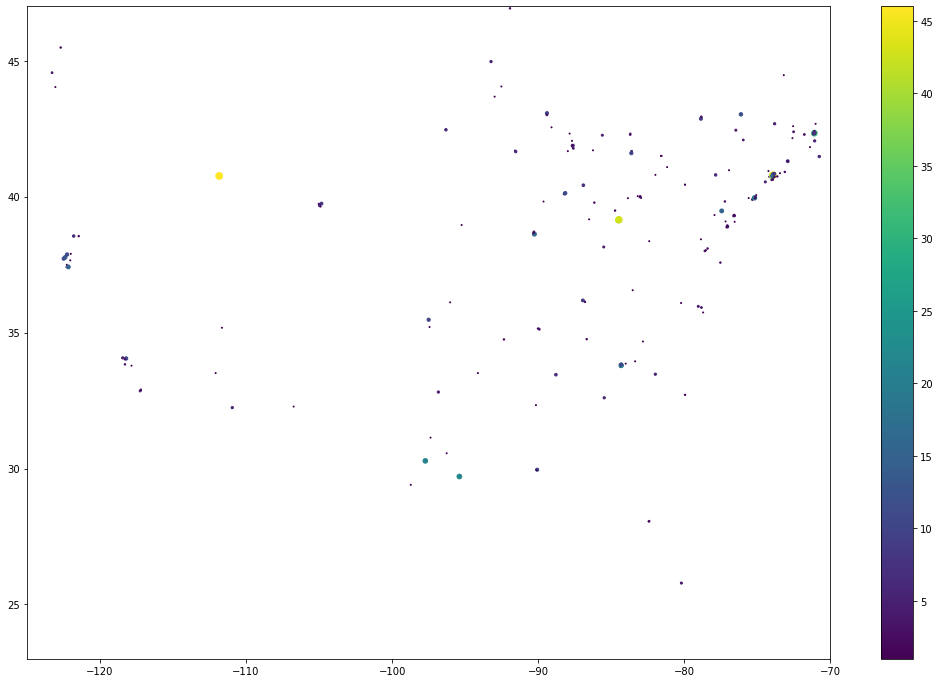

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(zip_long, zip_lat, s = zip_count, c= zip_count)
plt.colorbar()
# only continental us without Alaska
plt.xlim(-125, -70)
plt.ylim(23, 47)
# add a few cities for reference (OPTIONAL)
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plt.show()

In [20]:
zip_count[-89]

21